# Microarray analysis

In [1]:
library("limma")
library("ggplot2")
library("ggrepel")
library("ggfortify")
library("heatmap3")
library("biomaRt")
library("dplyr")
library("tidyr")
library(readxl)


Attaching package: ‘dplyr’


The following object is masked from ‘package:biomaRt’:

    select


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
# Leer archivo Excel (hoja 1 por defecto)
samples <- read_excel("data1-raw-test.xlsx")

# Escribir como CSV
write.csv(samples, "/home/fran/Documents/Doctorado/Inicios/Data/DiffExp/data1-raw-test.csv", row.names = FALSE)

In [4]:
samples

Gene_Symbol,WT_1.gProcessedSignal,WT_2.gProcessedSignal,Clon_4.gProcessedSignal,Clon_10.gProcessedSignal,RNA7_FN1_1.gProcessedSignal,RNA7_FN1_2.gProcessedSignal,RNA5_TLR4_1.gProcessedSignal,RNA5_TLR4_2.gProcessedSignal
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,1385.951000,2462.188000,1869.043000,2887.782000,1150.153000,1667.647000,984.107400,777.811100
LINC02615,3.412794,3.409920,11.550750,3.635055,3.672954,3.849384,6.798984,7.250548
LOC145474,20.109310,65.763980,40.979870,103.115900,110.580800,227.259000,101.170800,77.031590
LINP1,125.424300,241.432900,198.726200,89.555890,29.480540,29.584790,66.685530,40.632620
KIAA0040,2.245853,3.463457,15.185690,4.143822,4.747560,2.638522,7.226670,3.053636
LINC02541,2.487944,3.073503,3.093356,6.440082,2.557789,3.010060,4.966506,3.202615
NA,2.455807,3.058956,3.411150,3.552521,2.546655,2.988913,3.372188,3.160093
PRKCQ-AS1,15.982930,23.093690,23.069970,25.863590,9.306565,21.751030,31.382990,21.956660
LINC00458,2.524435,2.984406,2.931263,3.208516,2.775294,3.394076,3.262175,3.477665


In [5]:
# Filtrar columnas con 'WT' o 'TLR4' en el nombre
samples_filtered <- samples[, grepl("Gene_Symbol|WT.*ProcessedSignal|TLR4.*ProcessedSignal", colnames(samples))]

# Separar los nombres de los genes
genes <- samples_filtered$Gene_Symbol

# Crear matriz numérica (sin la columna de símbolos)
matriz <- as.matrix(samples_filtered[ , -1])
rownames(matriz) <- genes

## WT vs TLR4

We load the arrays correspondent to the HEK cells

Now let's normalize the arrays

In [6]:
matriz_log2 <- log2(matriz)  # o log2(x + offset) si tenés ceros
matriz_norm <- normalizeBetweenArrays(matriz_log2, method = "quantile")

In [11]:
#data_normW_HEK = normalizeWithinArrays(samples2, method = 'loess', bc.method = "auto", offset = 20)
#bc_data <- backgroundCorrect(data, method = 'normexp') # Calcula el ruido de backround de las muestras
#matriz_normalizada <- normalizeBetweenArrays(matriz, method = "quantile")

In [7]:
matriz_norm

,WT_1.gProcessedSignal,WT_2.gProcessedSignal,RNA5_TLR4_1.gProcessedSignal,RNA5_TLR4_2.gProcessedSignal
NA,10.513815,10.953356,9.910638,9.829353
LINC02615,1.854687,1.785964,2.728526,2.942576
LOC145474,4.448146,5.922378,6.540549,6.363602
LINP1,7.122185,7.718230,5.942288,5.441943
KIAA0040,1.385586,1.811817,2.811409,1.531426
LINC02541,1.531611,1.608851,2.310661,1.611681
NA,1.513824,1.602065,1.622160,1.590673
PRKCQ-AS1,4.085116,4.441364,4.847723,4.542904
LINC00458,1.551951,1.567579,1.573104,1.754531
LINC01512,6.039868,5.833101,5.504283,5.158292


### Post-Normalization Quality Controls

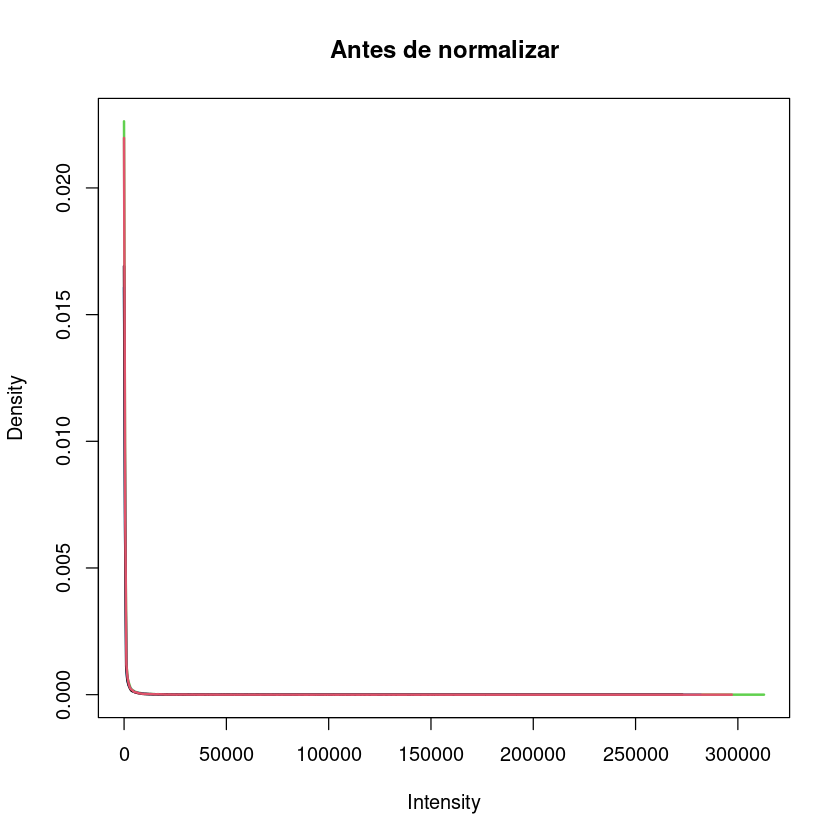

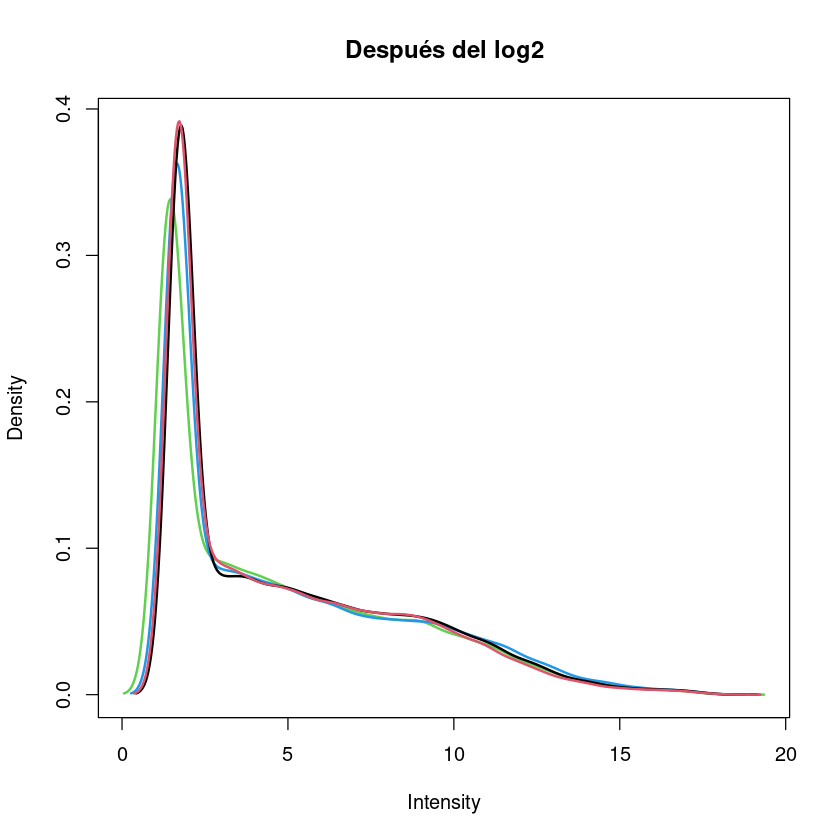

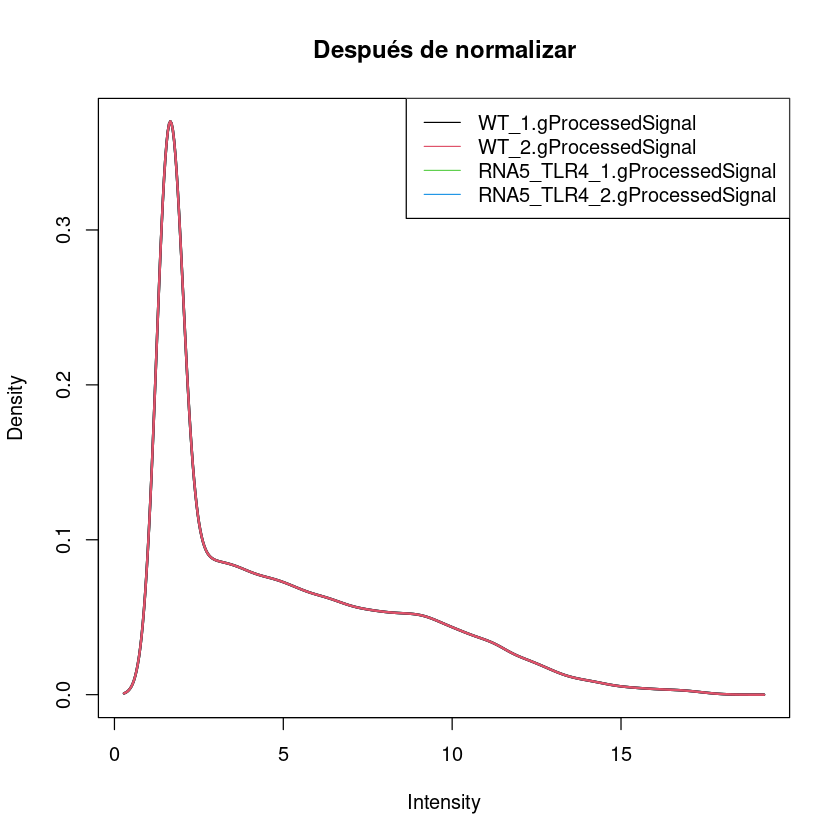

In [8]:
# Antes de cualquier gráfico
par(bg = "white")

# Densidad antes de transformar
plotDensities(matriz, main = "Antes de normalizar", legend = FALSE)

# Densidad después de log2
par(bg = "white")
plotDensities(matriz_log2, main = "Después del log2", legend = FALSE)

# Densidad después de normalizar
par(bg = "white")
plotDensities(matriz_norm, main = "Después de normalizar", legend = FALSE)

# Agregar leyenda (opcional)
legend("topright", legend = colnames(matriz), col = 1:ncol(matriz), lty = 1)

### Differential Expression

In [21]:
# Crear vector de grupos según el nombre de las columnas
grupos <- ifelse(grepl("WT", colnames(matriz_norm)), "WT", "TLR4")
grupos <- factor(grupos)

# Definir diseño
design <- model.matrix(~0 + grupos)
colnames(design) <- levels(grupos)

In [48]:
design 

,TLR4,WT
1,0,1
2,0,1
3,1,0
4,1,0


In [75]:
fit <- lmFit(matriz_norm, design)

# Definís el contraste: por ejemplo, TLR4 vs WT
contrast_matrix <- makeContrasts(TLR4 - WT, levels = design)

fit2 <- contrasts.fit(fit, contrast_matrix)
fit2 <- eBayes(fit2)

# Obtener genes diferenciales
top_table <- topTable(fit2, adjust = 'BH', coef = 1, number = 99999,  lfc = 0.58, p.value=0.05)
nrow(top_table)

[1] 0

In [72]:
top_table

,ID,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35712,ZNF350,-5.932576,4.349997,-81.50058,1.942042e-06,0.06943126,3.425785
50640,HMSD,-5.354338,4.080579,-71.73170,2.926546e-06,0.06943126,3.381871
31226,STK26,-6.501459,6.468347,-59.57426,5.313219e-06,0.06943126,3.296905
36598,RADX,-5.579037,4.643843,-57.88752,5.826521e-06,0.06943126,3.281099
52261,PRDM16,4.699949,4.001456,57.46624,5.964782e-06,0.06943126,3.276953
33483,ADD2,4.619928,3.868996,50.40698,9.085275e-06,0.08523745,3.193065
49026,FAM157B,-3.409239,3.263740,-44.87788,1.319136e-05,0.08523745,3.101834
13630,SOX5,3.178304,3.403313,43.88145,1.417694e-05,0.08523745,3.082157
34966,CARD16,3.621590,3.284815,41.79926,1.657016e-05,0.08523745,3.037111


In [18]:
write.csv(top_table_samples, file = "top_table_samples.csv", row.names = TRUE)

### VolcanoPlot, Heatmap and PCA

In [119]:
full_matrix = data_norm_samples$E
rownames(full_matrix) = data_norm_samples$genes$ProbeName

In [120]:
heatmap_plot <- function(tops, norm_matrix){
  top_matrix=subset(norm_matrix, rownames(norm_matrix) %in% tops$ProbeName)
  top_matrix=top_matrix[, order(colnames(top_matrix)), drop=F]
  heatmap3(top_matrix,
           Colv=NA, Rowv = NULL,
           showColDendro=F,
           showRowDendro=T,
           balanceColor = TRUE,
           xlab="Samples",
           ylab="Genes",
           labRow=rownames(top_matrix),
           labCol = colnames(top_matrix),
           cexCol = 1.5, cex.main=10, cexRow=2,
           margins=c(10,15))
}

In [121]:
options(repr.plot.width=13, repr.plot.height=13)
png("heatmap.png", width = 500, height = 500)
heatmap_plot(top_table_samples, full_matrix)
dev.off()



png 
  2

## H247 vs H322

In [174]:
design_HEK_vars = model.matrix(~0+targets$Variant[1:4])
fit_HEK_vars = lmFit(data_normB_HEK, design_HEK_vars)
fit_eb_HEK_vars = eBayes(fit_HEK_vars)
top_table_HEK_vars = topTable(fit_eb_HEK_vars, adjust = 'BH', coef = 1, number = 99999, lfc=0.58, p.value = 0.05)

In [175]:
top_table_HEK_vars[which(top_table_HEK_vars$SystematicName == "NM_000618"),]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_000618,15,70,0,A_23_P13907,NM_000618,1.200641,7.694383,12.57262,6.629005e-07,0.0008753427,6.509108


In [176]:
top_table_HEK_vars[which(top_table_HEK_vars$ControlType == 0),]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_020677,163,83,0,A_23_P26649,NM_020677,-1.812246,6.748795,-21.81855,6.101806e-09,0.0001076817,9.956058
ENST00000647353,83,91,0,A_22_P00011158,ENST00000647353,1.559174,7.795679,18.85212,2.142858e-08,0.0001194715,9.154861
NM_018933,351,73,0,A_23_P144627,NM_018933,1.536348,9.046189,17.55684,3.940223e-08,0.0001977125,8.731998
NM_153350,127,70,0,A_23_P406385,NM_153350,-1.337287,8.506927,-15.76723,9.845161e-08,0.0004050781,8.056224
NR_046287,384,151,0,A_22_P00012736,NR_046287,-1.476643,8.664979,-15.24877,1.307354e-07,0.0004157812,7.837629
NM_001702,296,153,0,A_33_P3285470,NM_001702,-1.297485,9.187605,-15.11368,1.409707e-07,0.0004157812,7.778820
ENST00000570163,306,51,0,A_19_P00809417,ENST00000570163,-1.232024,8.455595,-14.85933,1.627466e-07,0.0004157812,7.665935
NM_019071,7,97,0,A_23_P111811,NM_019071,1.346437,8.845606,14.79235,1.690854e-07,0.0004157812,7.635728
NM_138463,283,20,0,A_23_P420417,NM_138463,1.467502,7.285469,14.61691,1.870263e-07,0.0004157812,7.555648


In [181]:
top_table_HEK_vars = top_table_HEK_vars[which(top_table_HEK_vars$ControlType == 0),]
write.csv(top_table_HEK_vars, "DE_H247_H322.csv")

In [182]:
full_matrix_HEK_vars = data_normB_HEK$M
rownames(full_matrix_HEK_vars) = data_normB_HEK$genes$ProbeName

PNG 
  2

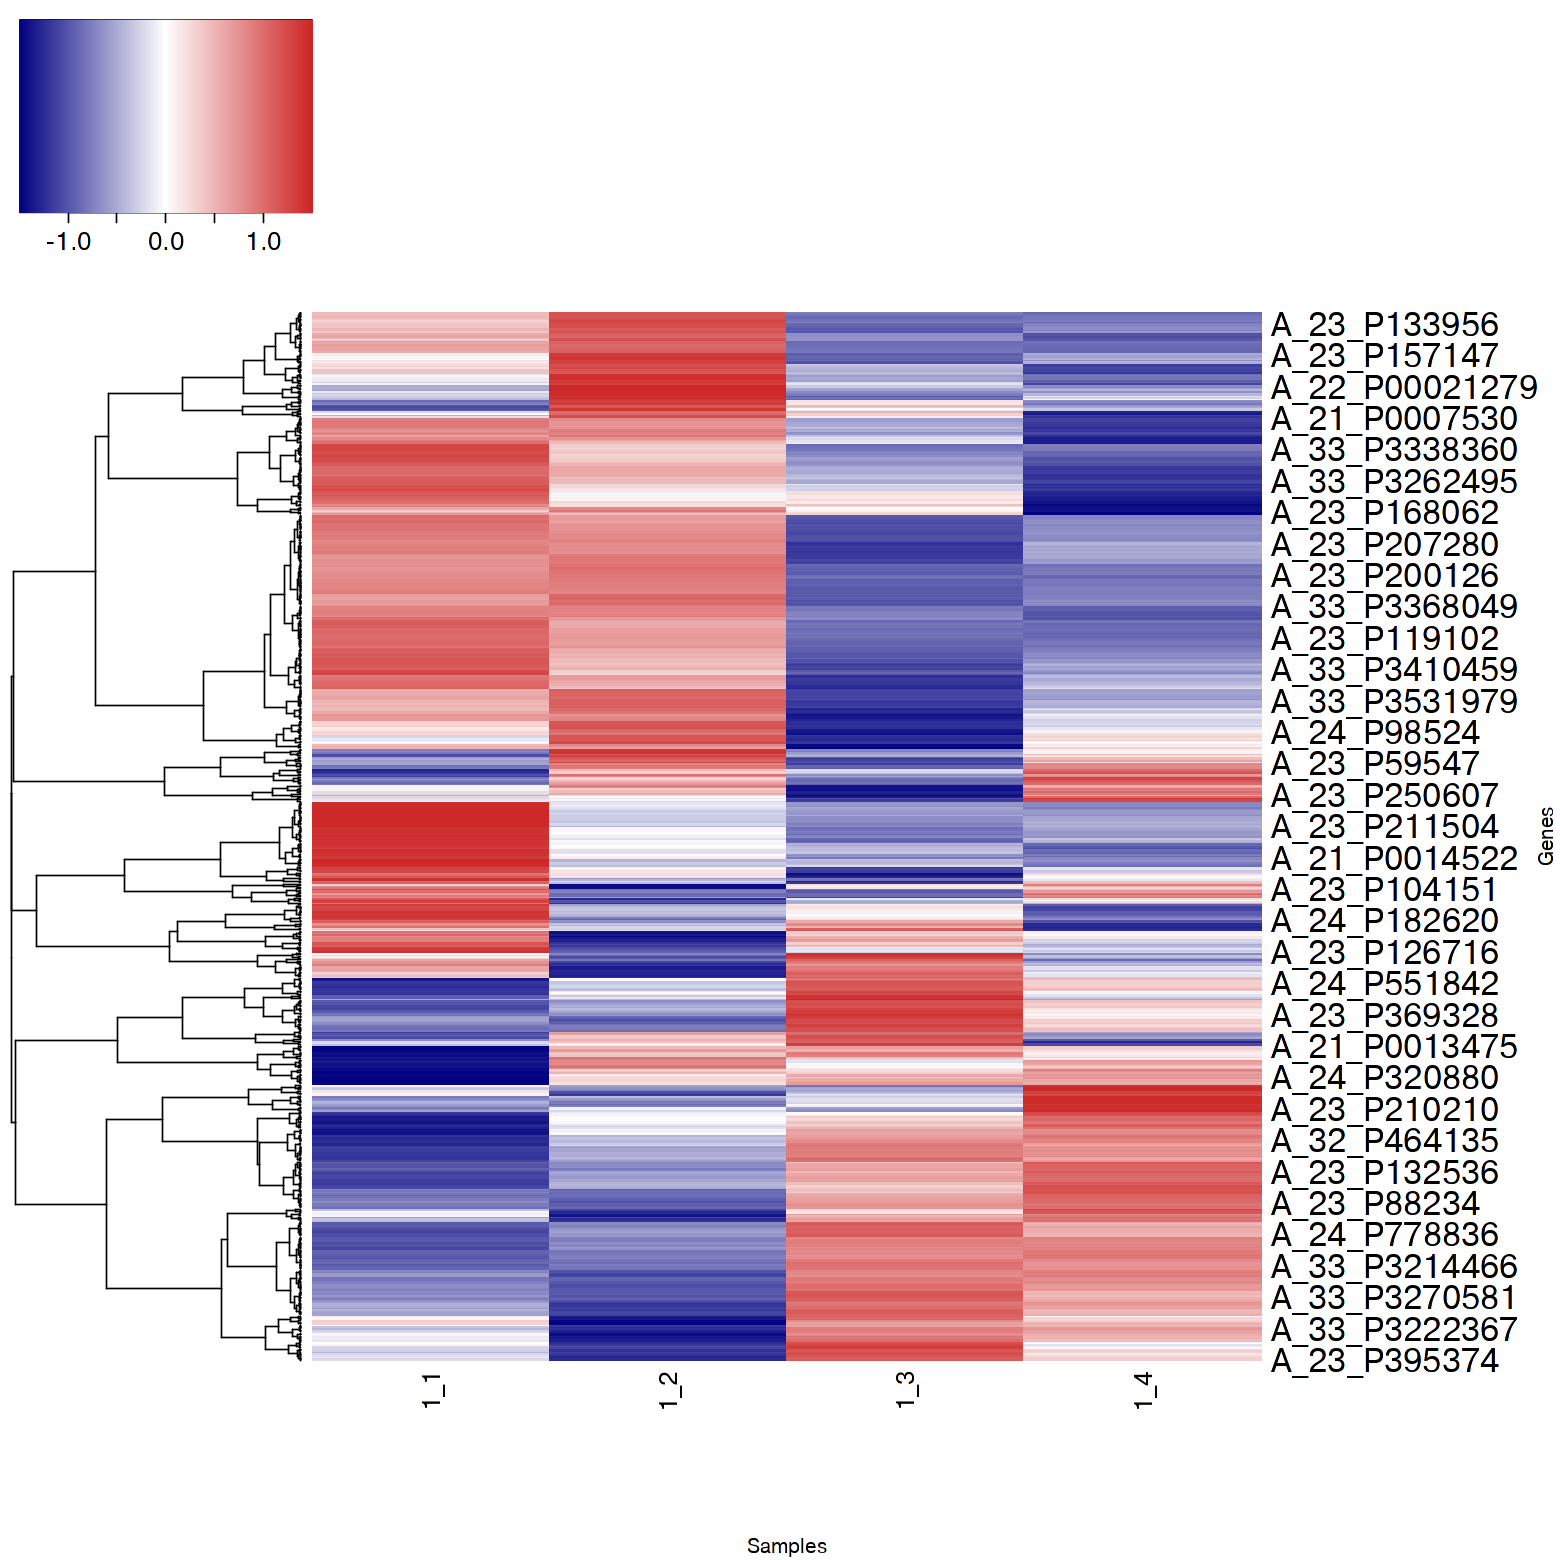

In [183]:
#options(repr.plot.width=13, repr.plot.height=13)
png("heatmap_H247_H322.png", width = 500, height = 500)
heatmap_plot(top_table_HEK_vars[which(top_table_HEK_vars$ControlType == 0),], full_matrix_HEK_vars)
dev.off()

## H247 vs ref1

In [184]:
raw_data_H247 = read.maimages(targets$sampleName[1:2], source="agilent")
data_normW_H247 = normalizeWithinArrays(raw_data_H247, method = 'loess', bc.method = "auto", offset = 20)
data_normB_H247 = normalizeBetweenArrays(data_normW_H247, method="Aquantile")
data_normB_H247 <- avereps(data_normB_H247, ID = data_normB_H247$genes$SystematicName)
print(summary(data_normB_H247$M))
mod_targets_H247 = targets[1:2,]
mod_targets_H247$Cy3 = mod_targets_H247$reference
mod_targets_H247$Cy5 = mod_targets_H247$CellType
design_H247 = modelMatrix(mod_targets_H247, ref="Ref1")
fit_H247 = lmFit(data_normB_H247, design_H247)
fit_eb_H247 = eBayes(fit_H247)
top_table_H247 = topTable(fit_eb_H247, adjust = 'BH', coef = 1, number = 99999, lfc=0, p.value = 0.05)
top_table_H247 = top_table_H247[which(top_table_H247$ControlType == 0),]
write.csv(top_table_H247, "DE_H247_Ref1.csv")
top_table_H247

Read 1_1.txt 
Read 1_2.txt 
      1_1                 1_2          
 Min.   :-8.330852   Min.   :-2.79321  
 1st Qu.:-0.135273   1st Qu.:-0.13313  
 Median : 0.000515   Median : 0.00404  
 Mean   : 0.002727   Mean   : 0.01092  
 3rd Qu.: 0.143895   3rd Qu.: 0.14914  
 Max.   : 3.468270   Max.   : 3.28228  
 NA's   :8           NA's   :1         
Found unique target names:
 HEK Ref1 


,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_020677,163,83,0,A_23_P26649,NM_020677,-1.812246,7.190715,-19.97627,2.356857e-08,0.0003119972,8.769827
ENST00000647353,83,91,0,A_22_P00011158,ENST00000647353,1.559174,7.991785,17.06886,8.539047e-08,0.0004760803,7.938315
NM_018933,351,73,0,A_23_P144627,NM_018933,1.536348,9.170460,16.34080,1.217924e-07,0.0006111300,7.690440
NM_138463,283,20,0,A_23_P420417,NM_138463,1.467502,7.221030,15.66844,1.713624e-07,0.0007816928,7.444804
NR_046287,384,151,0,A_22_P00012736,NR_046287,-1.476643,9.010351,-15.36010,2.013432e-07,0.0007848933,7.326395
NM_001044305,233,94,0,A_24_P380348,NM_001044305,1.463505,6.650895,15.21475,2.174723e-07,0.0007848933,7.269259
NM_017763,225,48,0,A_33_P3213029,NM_017763,-1.381502,7.123264,-15.20169,2.189905e-07,0.0007848933,7.264084
NM_153350,127,70,0,A_23_P406385,NM_153350,-1.337287,8.739897,-14.47061,3.262638e-07,0.0010034694,6.962841
NM_001702,296,153,0,A_33_P3285470,NM_001702,-1.297485,9.561894,-14.29545,3.599675e-07,0.0010034694,6.887170


In [185]:
top_table_H247[which(top_table_H247$SystematicName == "NM_000618"),]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_000618,15,70,0,A_23_P13907,NM_000618,1.200641,7.982291,12.88526,8.294135e-07,0.001396954,6.223498


In [186]:
raw_data_H322 = read.maimages(targets$sampleName[3:4], source="agilent")
data_normW_H322 = normalizeWithinArrays(raw_data_H322, method = 'loess', bc.method = "auto", offset = 20)
data_normB_H322 = normalizeBetweenArrays(data_normW_H322, method="Aquantile")
data_normB_H322 <- avereps(data_normB_H322, ID = data_normB_H322$genes$SystematicName)
mod_targets_H322 = targets[3:4,]
mod_targets_H322$Cy3 = mod_targets_H322$reference
mod_targets_H322$Cy5 = mod_targets_H322$CellType
design_H322 = modelMatrix(mod_targets_H322, ref="Ref1")
fit_H322 = lmFit(data_normB_H322, design_H322)
fit_eb_H322 = eBayes(fit_H322)
top_table_H322 = topTable(fit_eb_H322, adjust = 'BH', coef = 1, number = 99999, lfc=0.58, p.value = 0.05)
top_table_H322 = top_table_H322[which(top_table_H322$ControlType == 0),]
write.csv(top_table_H322, "DE_H322_Ref1.csv")
top_table_H322

Read 1_3.txt 
Read 1_4.txt 
Found unique target names:
 HEK Ref1 


,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_005345,17,62,0,A_23_P111132,NM_005345,-5.891091,10.885042,-52.30684,8.701678e-22,4.366328e-17,34.46212
NM_000067,136,71,0,A_23_P8913,NM_000067,4.388040,8.550273,46.65618,7.311995e-21,1.834506e-16,33.39315
NM_002133,11,69,0,A_23_P120883,NM_002133,-3.835225,10.158927,-40.14974,1.190735e-19,1.991623e-15,31.80018
NM_001099645,229,152,0,A_23_P143958,NM_001099645,3.512044,11.822391,38.38385,2.741563e-19,3.439154e-15,31.28244
NM_001007533,15,17,0,A_33_P3287472,NM_001007533,3.123708,6.840973,30.57268,1.833841e-17,1.840369e-13,28.39726
NM_153350,127,70,0,A_23_P406385,NM_153350,-2.376266,8.278783,-25.92780,3.767091e-16,2.407182e-12,26.06367
NM_001350211,166,161,0,A_23_P96599,NM_001350211,-2.503048,6.527775,-25.90141,3.837829e-16,2.407182e-12,26.04871
NR_121621,199,66,0,A_21_P0005818,NR_121621,-2.297910,7.060998,-25.15608,6.540059e-16,3.646301e-12,25.61707
NM_001302688,222,53,0,A_33_P3223592,NM_001302688,2.101606,8.615418,22.99361,3.355886e-15,1.683917e-11,24.25914


In [153]:
a=which(top_table_H322$SystematicName == "NM_000618")
top_table_H322[a,]

,Row,Col,ControlType,ProbeName,SystematicName,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<int>,<int>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NM_000618,15,70,0,A_23_P13907,NM_000618,1.067159,7.197387,7.549227,5.656331e-06,0.001005246,4.386091
